# Classification. Linear models and KNN

Этот ноутбук лучше смотреть через nbviewer:
https://nbviewer.org/github/bonvech/ml-intro-1/blob/main/5_classification_linear_knn/hw_classification.ipynb

Части 1 и 2 не получились. Часть 3 - частично.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [166]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        return 1 / (1 + np.exp((-1) * X @ weights))
    
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        # <your code>
        # ======>
        np.log(1 / (1 + np.exp((-1) * X @ weights)))
        pass

    
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        N = X_ext.shape[0]
        X = X_ext
        #wxi = np.sum(X @ self.weights_[:-1]) + self.weights_[-1]
        #print(wxi)
        for i in range(self.max_iter):
            print("i=", i)
            print("y.shape:", y.shape, " X.shape: ",  X.shape)
            A = y * X.T
            print(A.shape)
            #A = (1 - 1 / (1 + np.exp(- wxi * y)))
            #print(A.shape)
            #A =  y * X.T * (1 - 1 / (1 + np.exp(- wxi * y)))
            
            #A = self.eta / N * np.sum( y * X.T  * (1 - 1 / (1 + np.exp(- wxi * y))))
            A = 1 / ( 1 + np.exp( - ( X.dot( self.weights_ ) ) ) )
            tmp = ( A - y.T )        
            tmp = np.reshape( tmp, N )        
            delta = np.dot( X.T, tmp ) / N * self.eta      
            #delta = (
            #    self.eta / N * np.sum(y * X.T * 
            #    (1 - 1 / (1 + np.exp(- (X @ self.weights_)) * y)))
            #    - self.eta / self.C * self.weights_      
            #)
            print(delta)
            self.weights_ -= self.eta * delta
            #print(self.weights_)
            # if delta ** 1 < tol
            # ==>
            if np.sum(delta**2) < self.tol:
                print(np.sum(delta**2))
                break
    
    
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass
    
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)
lr_clf.fit(X_train, y_train)

i= 0
y.shape: (1437,)  X.shape:  (1437, 65)
(65, 1437)
[ 4.93736952e-04  0.00000000e+00  7.16771051e-05  1.51844120e-03
  5.46833681e-03  4.97042450e-03  2.05288796e-04 -5.06610995e-04
 -4.03618650e-05  4.17536534e-06  6.53444676e-04  4.65414057e-03
  6.86708420e-03  4.46416145e-03  2.13500348e-03  1.05427975e-04
  6.95894224e-06  1.04384134e-06  1.29540710e-03  6.34098817e-03
  4.09011830e-03  1.81697982e-03  3.12595685e-03  1.07654836e-03
  3.51426583e-05  6.95894224e-07  1.62178149e-03  5.62421712e-03
  2.47146834e-03  2.25469729e-03  2.77070285e-03  1.50452331e-03
  3.13152401e-06  0.00000000e+00  2.48190675e-03  5.87125957e-03
  4.63048017e-03  4.42519137e-03  3.47042450e-03  1.59533751e-03
  0.00000000e+00  1.56576200e-05  1.83959638e-03  7.50974252e-03
  5.33298539e-03  3.63778706e-03  4.38065414e-03  2.09046625e-03
  4.24495477e-05  1.35699374e-05  5.46624913e-04  6.00069589e-03
  5.82776618e-03  5.16910230e-03  5.55080028e-03  2.66353514e-03
  1.36743215e-04  1.04384134e-06  8

In [138]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)
lr_clf.fit(X_train, y_train)

0.0
i= 0
y.shape: (1437,)  X.shape:  (1437, 64)
(64, 1437)
(1437,)


In [5]:
from sklearn import datasets
from sklearn import metrics

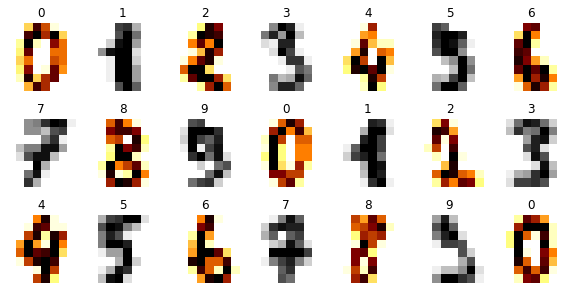

In [151]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test  = (y_test % 2) * 2 - 1

In [152]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test)  == [-1, 1]).all()

In [153]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [154]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [155]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

In [162]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)
lr_clf.fit(X_train, y_train)
print(lr_clf.weights_)

i= 0
y.shape: (1437,)  X.shape:  (1437, 65)
(65, 1437)
[ 4.93736952e-01  0.00000000e+00  7.16771051e-02  1.51844120e+00
  5.46833681e+00  4.97042450e+00  2.05288796e-01 -5.06610995e-01
 -4.03618650e-02  4.17536534e-03  6.53444676e-01  4.65414057e+00
  6.86708420e+00  4.46416145e+00  2.13500348e+00  1.05427975e-01
  6.95894224e-03  1.04384134e-03  1.29540710e+00  6.34098817e+00
  4.09011830e+00  1.81697982e+00  3.12595685e+00  1.07654836e+00
  3.51426583e-02  6.95894224e-04  1.62178149e+00  5.62421712e+00
  2.47146834e+00  2.25469729e+00  2.77070285e+00  1.50452331e+00
  3.13152401e-03  0.00000000e+00  2.48190675e+00  5.87125957e+00
  4.63048017e+00  4.42519137e+00  3.47042450e+00  1.59533751e+00
  0.00000000e+00  1.56576200e-02  1.83959638e+00  7.50974252e+00
  5.33298539e+00  3.63778706e+00  4.38065414e+00  2.09046625e+00
  4.24495477e-02  1.35699374e-02  5.46624913e-01  6.00069589e+00
  5.82776618e+00  5.16910230e+00  5.55080028e+00  2.66353514e+00
  1.36743215e-01  1.04384134e-03  8

In [167]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

AssertionError: 

In [ ]:
model = CustomLogisticRegression()

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
train_acc, test_acc

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [ ]:
## your code

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        # <your code>
        pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        # <your code>
        pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [171]:
PATH = "../data/"

In [178]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')
data.shape

(100000, 11)

In [173]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

----- Распределение по полу ---
male      56114
female    43886
Name: Sex, dtype: int64


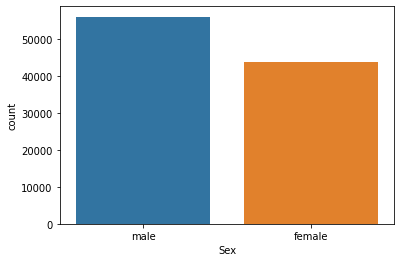

In [187]:
# How many females and males are there in the dataset?
print("----- Распределение по полу ---")
print(data['Sex'].value_counts())
sns.countplot(x='Sex', data=data);

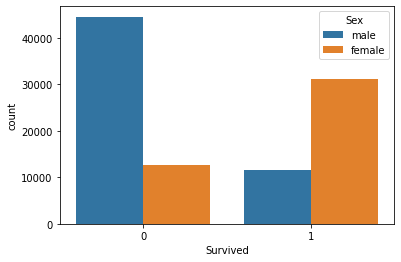

In [188]:
###  Распределение выживших по полу 
sns.countplot(hue='Sex', x='Survived', data=data);

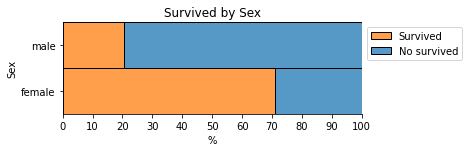

In [238]:
fig = sns.displot(
    data=data,
    y="Sex",
    hue="Survived",
    bins=2,
    multiple="fill",
    hue_order=[0, 1],
    legend=False,
    height=2,
    aspect=8/3,
)
fig.set(ylabel="Sex", xlabel="%")
plt.xticks([x / 10 for x in range(11)], range(0, 101, 10))  # %
plt.title("Survived by Sex")
plt.legend(["Survived", "No survived"], bbox_to_anchor=(1.0, 1.0))
plt.show()

In [251]:
supv = data.groupby(['Sex', 'Survived'])['Sex'].count()
print(supv)
print(f"Процент выживших среди женщин: {100 * supv[1] / (supv[0] + supv[1]):.1f}")
print(f"Процент выживших среди мужчин: {100 * supv[3] / (supv[2] + supv[3]):.1f}")

Sex     Survived
female  0           12660
        1           31226
male    0           44566
        1           11548
Name: Sex, dtype: int64
Процент выживших среди женщин: 71.2
Процент выживших среди мужчин: 20.6


*****
#### `ОБСУЖДЕНИЕ`

    Is there any relationship between the gender and the survival?

Мужчин на борту было больше, чем женщин. Среди выживших больше женщин,чем мужчин. 
71% женщин выжил, из мужчин - только 21%.

Вывод: принадлежность к женскому полу повыщает вероятность выжить

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

In [ ]:
## your code

< your thoughts >

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64


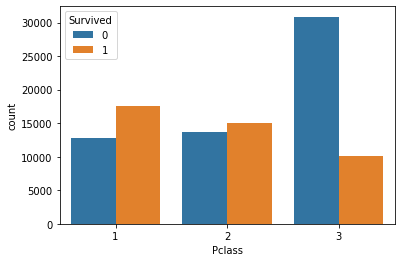

In [216]:
###  Pclass - класс каюты
print(data.Pclass.value_counts())
sns.countplot(x='Pclass', hue='Survived', data=data);

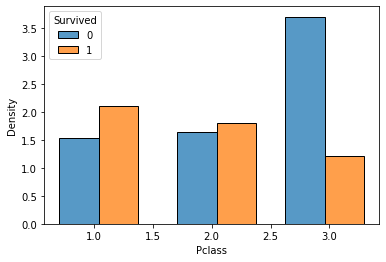

In [222]:
ax = sns.histplot(x=data['Pclass'], hue=data['Survived'], multiple="dodge", shrink=8,
                  stat='density', common_norm=False)

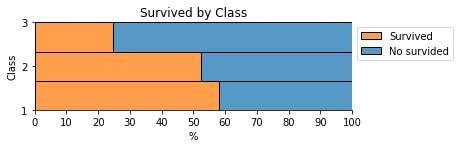

In [235]:
fig = sns.displot(
    data=data, y="Pclass", hue="Survived",
    bins=3, multiple="fill",hue_order=[0, 1],
    legend=False, height=2, aspect=8/3,
)
fig.set(ylabel="Class", xlabel="%")
plt.yticks([1, 2, 3])  # Pclass
plt.xticks([x / 10 for x in range(11)], range(0, 101, 10))
plt.title("Survived by Class")
plt.legend(["Survived", "No survided"], bbox_to_anchor=(1.0, 1.0));

In [264]:
## Процент выживших пассажиров по классам
surv = data.dropna(subset=["Pclass"]).groupby(['Pclass', 'Survived'])['Pclass'].count()
print(surv)
for i in range(1, 4):
    print(f"Процент выживших среди пассажиров {i} класса: {100 * surv[i][1] / (surv[i][0] + surv[i][1]):.1f}")

Pclass  Survived
1       0           12739
        1           17576
2       0           13622
        1           15057
3       0           30865
        1           10141
Name: Pclass, dtype: int64
Процент выживших среди пассажиров 1 класса: 58.0
Процент выживших среди пассажиров 2 класса: 52.5
Процент выживших среди пассажиров 3 класса: 24.7


<AxesSubplot:xlabel='Pclass', ylabel='count'>

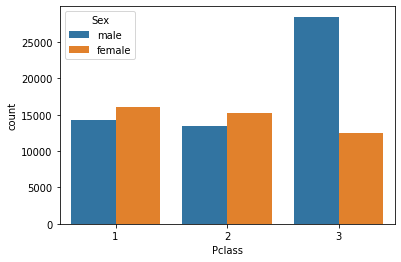

In [283]:
###  Гендерный состав пассажиров разных классов 
sns.countplot(x="Pclass", hue="Sex", data=data)

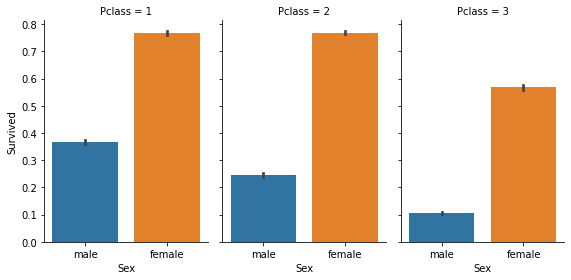

In [290]:
# Процент выживших в зависимости от пола по классам
g = sns.catplot(col="Pclass", x="Sex", y="Survived",
                data=data, kind="bar", height=4, aspect=.67);

*****
#### `ОБСУЖДЕНИЕ`

    What class was "the safest"? 

Самый безопасный класс - первый. Процент выживших пассажиров первого класса самый высокий - 58%. Самый "опасный" - третий класс, процент выживших - 25%.

Более того - любой класс более безопасен для женщин. В каждом из классов процент выживших женщин больше, чем мужчин. 

В третьем классе мужчин было в три раза больше, чем женщин, а выжило их в 10 раз меньше, чем женщин в этом же классе.
    
    Is there any relationship between the embarkation port and the survival? 


S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64


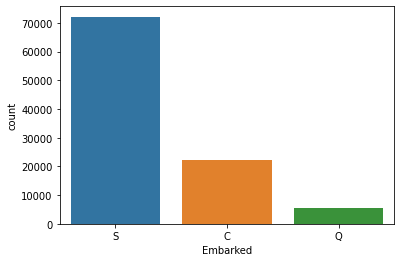

In [267]:
### Embarked - место посадки
print(data.Embarked.value_counts())
sns.countplot(x='Embarked', data=data);

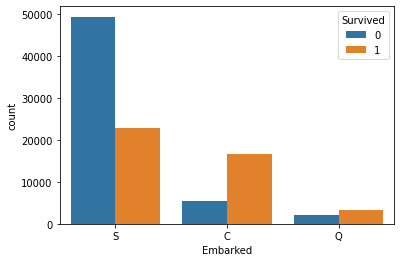

In [270]:
###  Распределение выживших по месту посадки
sns.countplot(hue='Survived', x='Embarked', data=data);

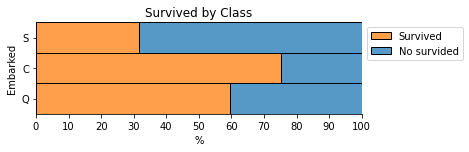

In [273]:
fig = sns.displot(
    data=data, y="Embarked", hue="Survived",
    bins=3, multiple="fill", hue_order=[0, 1], 
    legend=False, height=2, aspect=8/3,
)
fig.set(ylabel="Embarked", xlabel="%")
plt.yticks(["S", "C", "Q"])  # Pclass
plt.xticks([x / 10 for x in range(11)], range(0, 101, 10))
plt.title("Survived by Embarked")
plt.legend(["Survived", "No survided"], bbox_to_anchor=(1.0, 1.0));

In [281]:
## Процент выживших пассажиров по порту
surv = data.dropna(subset=["Embarked"]).groupby(['Embarked', 'Survived'])['Embarked'].count()
print(surv)
for i in ["S", "C", "Q"]:
    print(f"Процент выживших среди пассажиров порта {i}: {100 * surv[i][1] / (surv[i][0] + surv[i][1]):.1f}")

Embarked  Survived
C         0            5518
          1           16669
Q         0            2186
          1            3238
S         0           49394
          1           22745
Name: Embarked, dtype: int64
Процент выживших среди пассажиров порта S: 31.5
Процент выживших среди пассажиров порта C: 75.1
Процент выживших среди пассажиров порта Q: 59.7


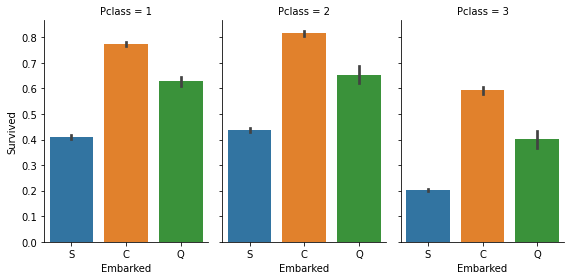

In [291]:
# Процент выживших в зависимости от порта по классам: 
g = sns.catplot(col="Pclass", x="Embarked", y="Survived",
                data=data, kind="bar", height=4, aspect=.67);

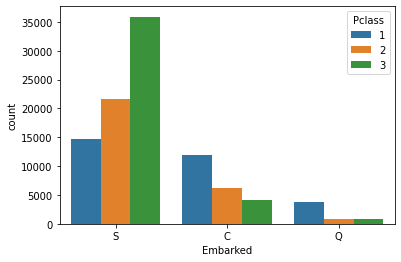

In [293]:
###  Распределение классов по месту посадки
sns.countplot(hue='Pclass', x='Embarked', data=data);

*****
#### `ОБСУЖДЕНИЕ` 
    
    Is there any relationship between the embarkation port and the survival? 

Процент выживших пассажиров из порта Cherbourg самый высокий в целом по всем данным и в каждом классе по отдельности. Среди севших в этом порту больше всего пассажиров первого класса. Возможно, пассажиры других классов были помощниками/слугами этих пассажиров и они спаслись вместе с хозяевами.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [299]:
## Количество пропущенных значений
data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [298]:
## Доля пропущенных значений
data.isnull().sum() / data.isnull().count() * 100

Survived     0.000
Pclass       0.000
Name         0.000
Sex          0.000
Age          3.292
SibSp        0.000
Parch        0.000
Ticket       4.623
Fare         0.134
Cabin       67.866
Embarked     0.250
dtype: float64

In [311]:
## Cabin analysis
print(len(data.Cabin.unique()))
print(data.Cabin.unique())
data.Cabin.dropna().apply(lambda x: x[0]).unique()

26993
['C12239' nan 'A7253' ... 'D12975' 'F12072' 'D17243']


array(['C', 'A', 'D', 'B', 'E', 'F', 'G', 'T'], dtype=object)

In [331]:
##  Ticket analysis
print(len(data.Ticket.unique()))
print(data.Ticket.unique())
sorted(data.Ticket.dropna().apply(lambda x: x[0:2] if x[0:2].isalpha() else x[0] if x[0].isalpha() else "").unique())

75332
['209245' '27323' 'CA 457703' ... 'PC 15008' '458654' '458074']


['',
 'A',
 'AQ',
 'C',
 'CA',
 'F',
 'Fa',
 'LP',
 'P',
 'PC',
 'PP',
 'S',
 'SC',
 'SO',
 'ST',
 'SW',
 'W',
 'WE']

In [315]:
## Совпадение пропусков в цене и порте посадки.
missing = ['Age', 'Ticket', 'Cabin', 'Embarked', 'Fare']
for feature in missing:
    print("\n----- ", feature, "is null -----")
    print(data[data[feature].isnull()][missing].isnull().sum())


-----  Age is null -----
Age         3292
Ticket       156
Cabin       2247
Embarked       2
Fare           5
dtype: int64

-----  Ticket is null -----
Age          156
Ticket      4623
Cabin       4540
Embarked       9
Fare           6
dtype: int64

-----  Cabin is null -----
Age          2247
Ticket       4540
Cabin       67866
Embarked      162
Fare           92
dtype: int64

-----  Embarked is null -----
Age           2
Ticket        9
Cabin       162
Embarked    250
Fare          1
dtype: int64

-----  Fare is null -----
Age           5
Ticket        6
Cabin        92
Embarked      1
Fare        134
dtype: int64


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

*****
#### `ОБСУЖДЕНИЕ` 
    
Есть пропущенные данные в возрасте, номере билета, стоимости билета, каюте, месте посадки. Как поступить с этими значениями?

*Возраст*. 3.3% пропусков. Можно заполнить средним по полу и классу.

*Номер билета* 4.6% пропусков. Почти у всех пропусков также неизвестна каюта.

*Каюта* 67% пропусков. Имеется 27 тыс различных значений. Слишком много пропущенных значений, наверное, можно просто игнорировать этот признак. Так мы потеряем часть информации, но заменять их непонятно как. Можно, в принципе, искать родственников, брать их номер каюты.

При более внимательном рассмотрении оказалось, что у каюты есть первая буква, возможно, отвечающая за палубу. Можно попытаться восстановить эту букву по классу и стоимости билета.

*Стоимость билета* 134 пропуска, 0.1%. Можно заполнить средним по классу и порту.

*Место посадки* 0.3% пропусков, всего 250 человек. Возможно, это команда корабля. Можно выделить для их в отдельный порт посадки, назовем его "U".

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [332]:
## Label encoding
from sklearn import preprocessing
  
#label_encoder преобразует нечисловые значения в числовые
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [333]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,27.14,C12239,2
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,13.35,NaN,2
2,0,3,"Owens, Kenneth",1,0.33,1,2,CA 457703,71.29,NaN,2
3,0,3,"Kramer, James",1,19.00,0,0,A. 10866,13.04,NaN,2
4,1,3,"Bond, Michael",1,25.00,0,0,427635,7.76,NaN,2


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [ ]:
## your code

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.